In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

In [98]:
df = pd.read_csv("/Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/data mining /HRemployee/HR Employee data.csv")

In [ ]:
print(df.info()) 
print(df.describe()) 
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [ ]:
numerical_columns = ['TotalWorkingYears', 'PercentSalaryHike', 'MonthlyRate']
data_numerical = df[numerical_columns]

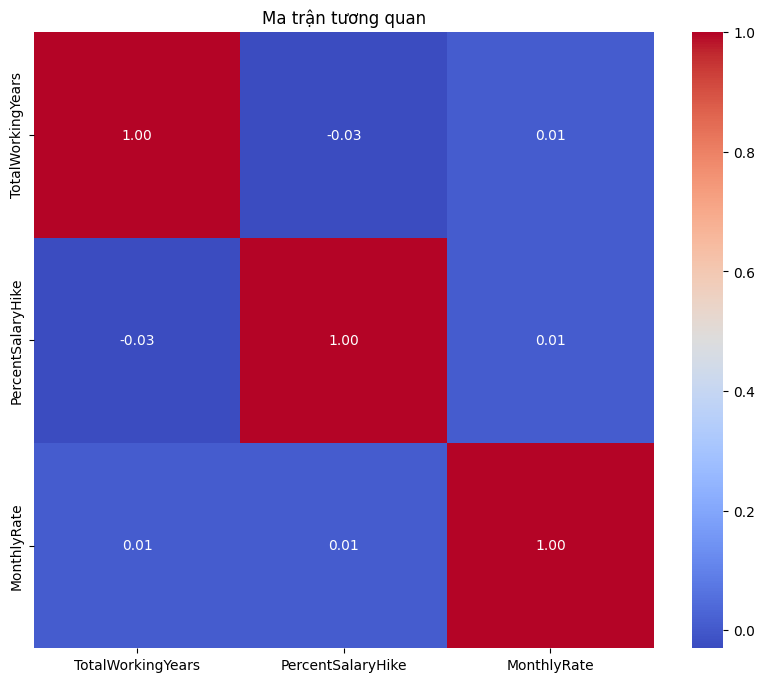

In [ ]:
correlation_matrix = data_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan')
plt.show()

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_numerical.columns)
print(data_scaled_df.head())

   TotalWorkingYears  PercentSalaryHike  MonthlyRate
0           3.922848          -0.916160    -1.527613
1           3.094887          -0.916160    -1.570615
2           3.232881           0.403220     0.047318
3           3.370874          -1.246005    -1.468168
4           3.922848          -0.916160     1.613395


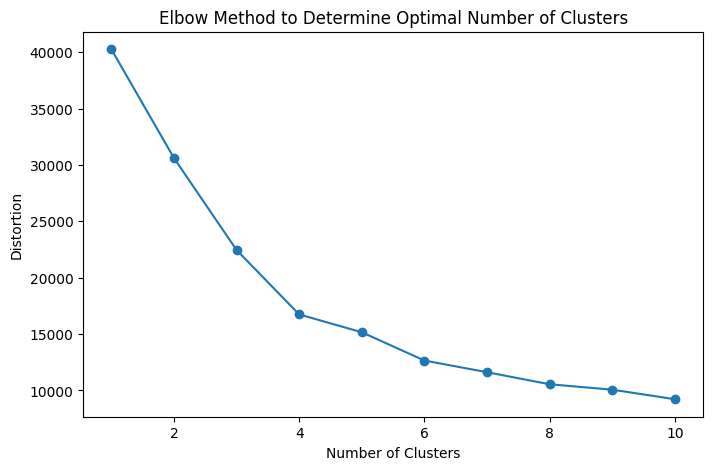

In [9]:
# Tìm số cụm tối ưu bằng Elbow Method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_scaled_df)
    distortions.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

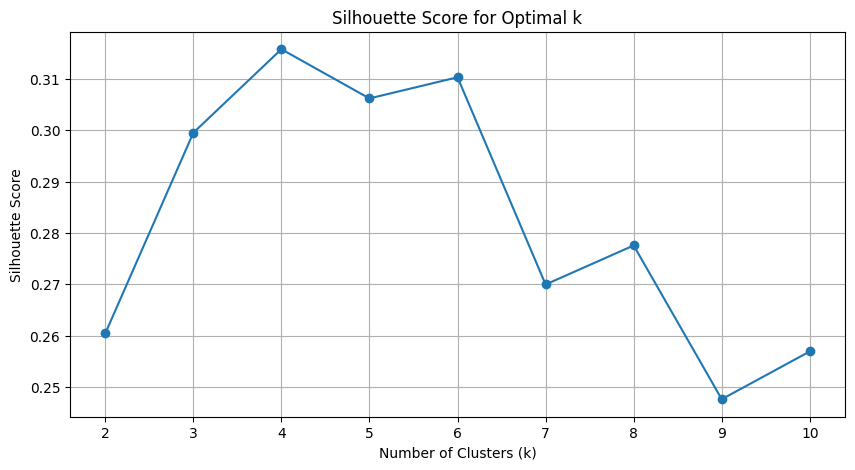

In [ ]:
range_k = range(2, 11)  # Kiểm tra từ 2 đến 10 cụm
silhouette_scores = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled_df)
    silhouette_avg = silhouette_score(data_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(10, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_k)
plt.grid()
plt.show()

Kết quả phân cụm:
 Cluster
3          4281
0          4229
1          2833
2          2080
Name: count, dtype: int64


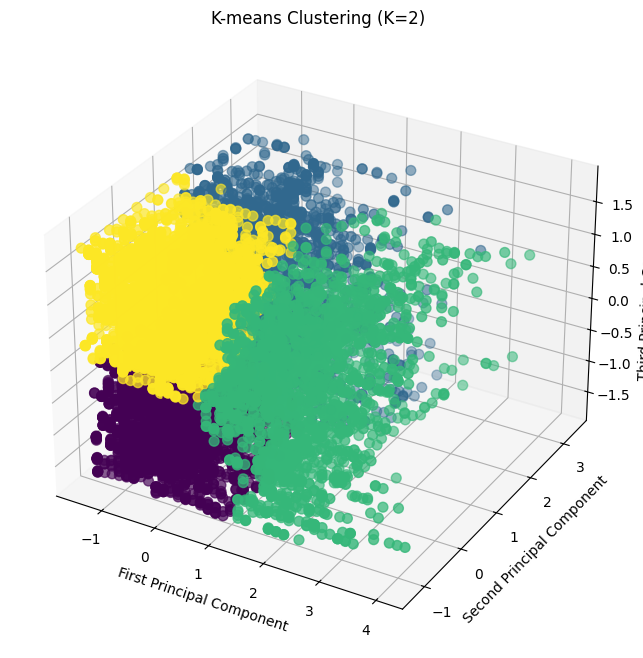

In [144]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(data_scaled_df)
df['Cluster'] = kmeans.fit_predict(data_scaled_df)
print("Kết quả phân cụm:\n", df[['Cluster']].value_counts())
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = data_scaled[:, 0]  
y = data_scaled[:, 1]  
z = data_scaled[:, 2]  
scatter = ax.scatter(x, y, z, c=kmeans.labels_, cmap="viridis", s=50)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
ax.set_title("K-means Clustering (K=2)")
plt.show()


In [ ]:
# Lấy tọa độ centroid của từng cụm
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Centroid của cụm {i}: {centroid}")

Centroid của cụm 0: [-3.73680388e-01 -3.85474997e-01 -9.43611249e-01  4.44089210e-15]
Centroid của cụm 1: [-0.21442421  1.49137113  0.07676729  3.        ]
Centroid của cụm 2: [ 1.84352484 -0.2783536   0.01173619  2.        ]
Centroid của cụm 3: [-0.3846703  -0.47089586  0.87564563  1.        ]


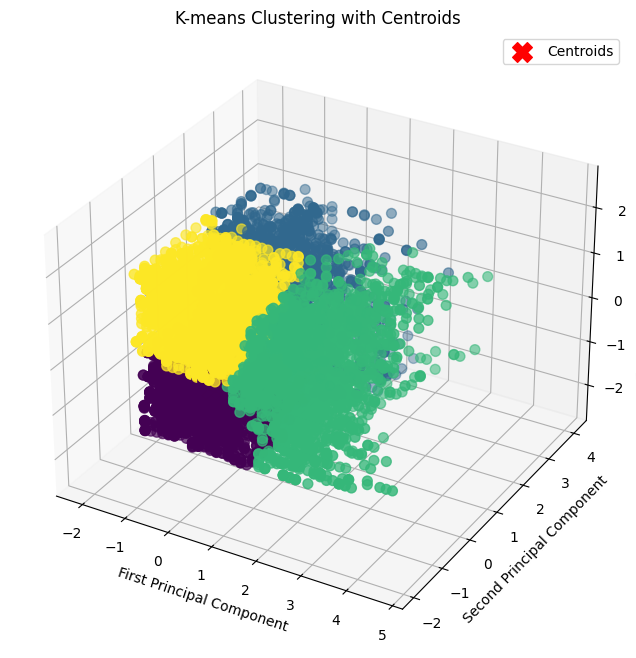

In [148]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x = data_scaled[:, 0]  
y = data_scaled[:, 1]  
z = data_scaled[:, 2]  
scatter = ax.scatter(x, y, z, c=kmeans.labels_, cmap="viridis", s=50)

ax.set_xlim([x.min() - 1, x.max() + 1])
ax.set_ylim([y.min() - 1, y.max() + 1])
ax.set_zlim([z.min() - 1, z.max() + 1])



centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]
centroids_z = centroids[:, 2]
ax.scatter(centroids_x, centroids_y, centroids_z, c='red', s=200, marker='X', label='Centroids')


ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
ax.set_title("K-means Clustering with Centroids")
ax.legend()
plt.show()


In [54]:
df

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated,Cluster,Cluster_Hierarchical,Cluster_Updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,3,Yes,2019.0,long hours,Voluntary,BOS,L7,2,1,1
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,3,Yes,2018.0,medical issues,Voluntary,NYC,L6,2,1,1
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,4,Yes,2018.0,retiring,Voluntary,OTT,L6,2,1,2
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,3,Yes,2019.0,career change,Voluntary,NYC,L7,2,1,1
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,3,Yes,2018.0,retiring,Voluntary,CAL,L5,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,113418,2021,36,Travel_Frequently,1266,Corporate Functions,9,Diploma,1,240,...,1,No,NaN,NaN,NaN,OTT,L1,0,3,1
13419,113419,2021,31,Travel_Rarely,424,Corporate Functions,6,Bachelors,1,1919,...,1,No,NaN,NaN,NaN,TOR,L1,3,2,0
13420,113420,2021,36,Travel_Rarely,927,Product,5,Diploma,1,108,...,1,No,NaN,NaN,NaN,OTT,L1,0,3,1
13421,113421,2021,58,Travel_Rarely,1200,Sales,14,Bachelors,1,1836,...,1,No,NaN,NaN,NaN,TOR,L4,2,1,0


In [41]:
labels = df['Cluster']
silhouette_avg = silhouette_score(data_scaled_df, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.32


/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/3414772610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette=cluster_colors)
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/3414772610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette=cluster_colors)
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/3414772610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette=cluster_col

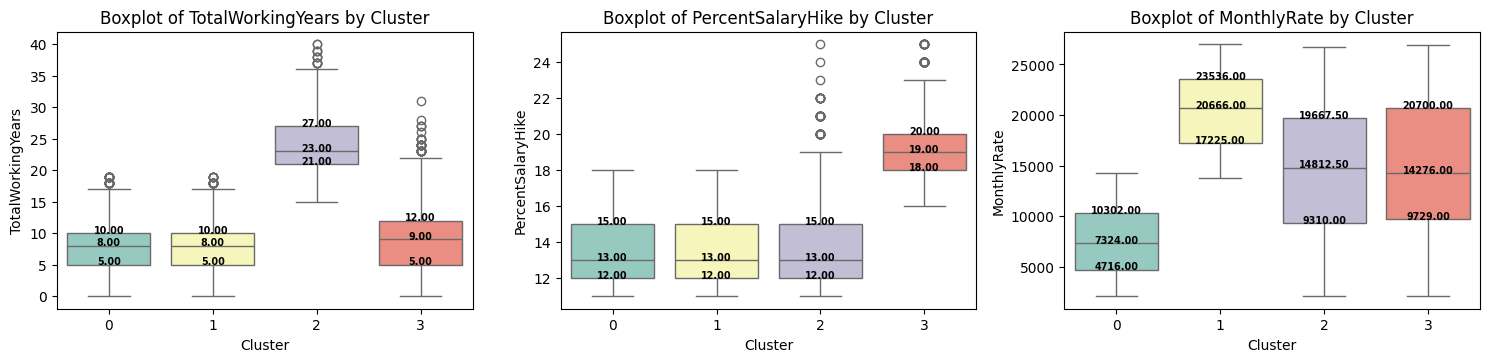

In [42]:
cluster_colors = sns.color_palette("Set3", n_colors=df['Cluster'].nunique())
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_numerical.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=column, data=df, palette=cluster_colors)
    for j in range(df['Cluster'].nunique()):
        q25 = df[df['Cluster'] == j][column].quantile(0.25)
        q50 = df[df['Cluster'] == j][column].median()
        q75 = df[df['Cluster'] == j][column].quantile(0.75)
        xpos = j
        ypos = q50
        plt.text(xpos, q25, f'{q25:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        plt.text(xpos, ypos, f'{q50:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        plt.text(xpos, q75, f'{q75:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [ ]:
cluster_description = df.groupby('Cluster')[['TotalWorkingYears', 'PercentSalaryHike', 'MonthlyRate']].describe()
print(cluster_description.to_string())

        TotalWorkingYears                                                    PercentSalaryHike                                                    MonthlyRate                                                                        
                    count       mean       std   min   25%   50%   75%   max             count       mean       std   min   25%   50%   75%   max       count          mean          std      min      25%      50%      75%      max
Cluster                                                                                                                                                                                                                              
0                  4229.0   7.864271  3.941270   0.0   5.0   8.0  10.0  19.0            4229.0  13.608891  1.844544  11.0  12.0  13.0  15.0  18.0      4229.0   7566.677229  3287.297772   2097.0   4716.0   7324.0  10302.0  14221.0
1                  4281.0   7.784630  4.013687   0.0   5.0   8.0  10.0  19.0    

In [44]:
filtered_data = pd.DataFrame()
for cluster_id in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_id]
    Q1 = cluster_data['TotalWorkingYears'].quantile(0.25)
    Q3 = cluster_data['TotalWorkingYears'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cluster_filtered = cluster_data[
        (cluster_data['TotalWorkingYears'] >= lower_bound) &
        (cluster_data['TotalWorkingYears'] <= upper_bound)
    ]   
    filtered_data = pd.concat([filtered_data, cluster_filtered])


In [45]:
df_filtered= filtered_data

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/3147432000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_filtered, palette=cluster_colors)
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/3147432000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_filtered, palette=cluster_colors)
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/3147432000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_fi

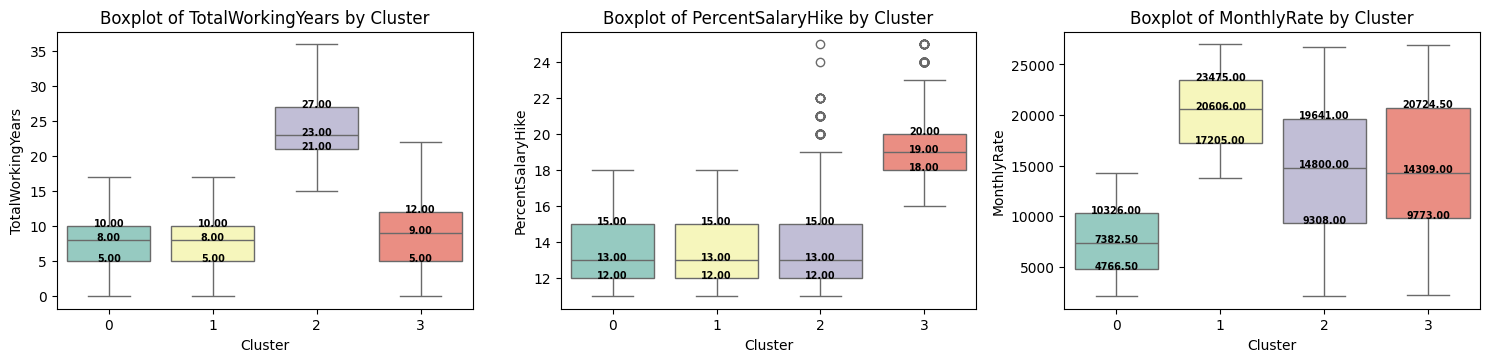

In [56]:
cluster_colors = sns.color_palette("Set3", n_colors=df_filtered['Cluster'].nunique())
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_numerical.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=column, data=df_filtered, palette=cluster_colors)   
    for j in range(df['Cluster'].nunique()):
        q25 = df_filtered[df_filtered['Cluster'] == j][column].quantile(0.25)
        q50 = df_filtered[df_filtered['Cluster'] == j][column].median()
        q75 = df_filtered[df_filtered['Cluster'] == j][column].quantile(0.75)       
        xpos = j
        ypos = q50
        plt.text(xpos, q25, f'{q25:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        plt.text(xpos, ypos, f'{q50:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        plt.text(xpos, q75, f'{q75:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

#EDA

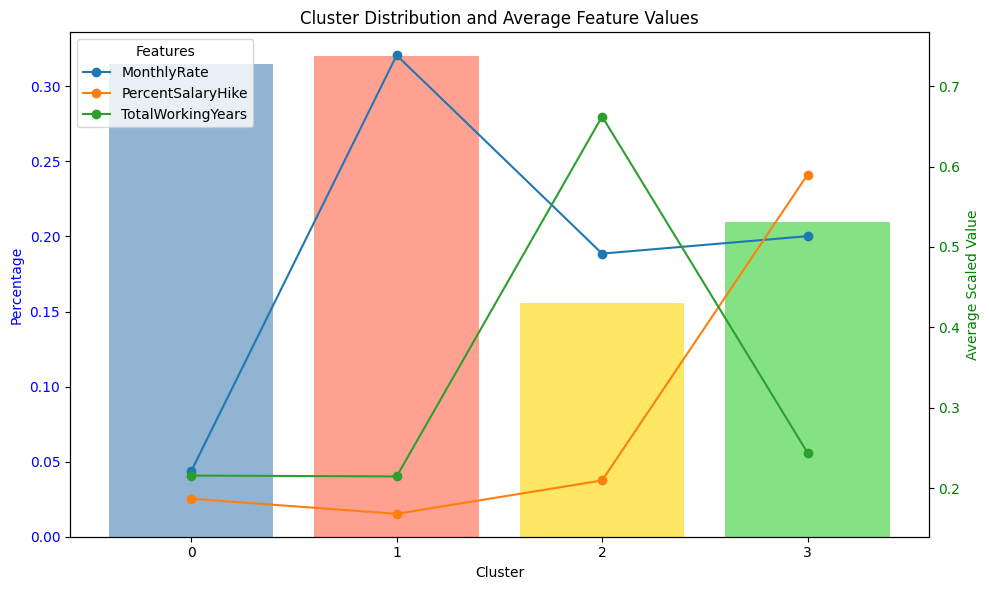

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Chọn các thuộc tính bạn muốn tính giá trị trung bình
features = ['MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears']

# Chuẩn hóa các thuộc tính
scaler = MinMaxScaler()
df_filtered[features] = scaler.fit_transform(df_filtered[features])
# Tính tỷ lệ phần trăm số lượng mẫu trong từng cụm
cluster_counts = df_filtered['Cluster'].value_counts(normalize=True)

# Tính giá trị trung bình của các thuộc tính theo từng cụm
mean_values = df_filtered.groupby('Cluster')[features].mean()

# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart: phân phối các cụm
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Màu sắc cho từng cụm
ax1.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.6, label='Cluster Distribution')
# Đặt tiêu đề và nhãn cho trục x, y
ax1.set_title('Cluster Distribution and Average Feature Values')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Percentage', color='blue')
ax1.set_xticks(cluster_counts.index)  # Đảm bảo các nhãn trên trục X đúng
ax1.set_xticklabels(cluster_counts.index, rotation=0)
ax1.tick_params(axis='y', labelcolor='blue')
# Tạo trục y thứ hai để vẽ line chart
ax2 = ax1.twinx()
for feature in features:
    ax2.plot(mean_values.index, mean_values[feature], marker='o', label=feature)
# Đặt nhãn và màu sắc cho trục y thứ hai
ax2.set_ylabel('Average Scaled Value', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Thêm legend
ax2.legend(title='Features', loc='upper left')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#Đối với thụật toán hierarchical

In [15]:
columns = ['TotalWorkingYears', 'PercentSalaryHike', 'MonthlyRate']
df_FP = df[columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_FP)
scaled_df = pd.DataFrame(data_scaled, columns=df_FP.columns)
print(scaled_df.head())

   TotalWorkingYears  PercentSalaryHike  MonthlyRate
0           3.922848          -0.916160    -1.527613
1           3.094887          -0.916160    -1.570615
2           3.232881           0.403220     0.047318
3           3.370874          -1.246005    -1.468168
4           3.922848          -0.916160     1.613395


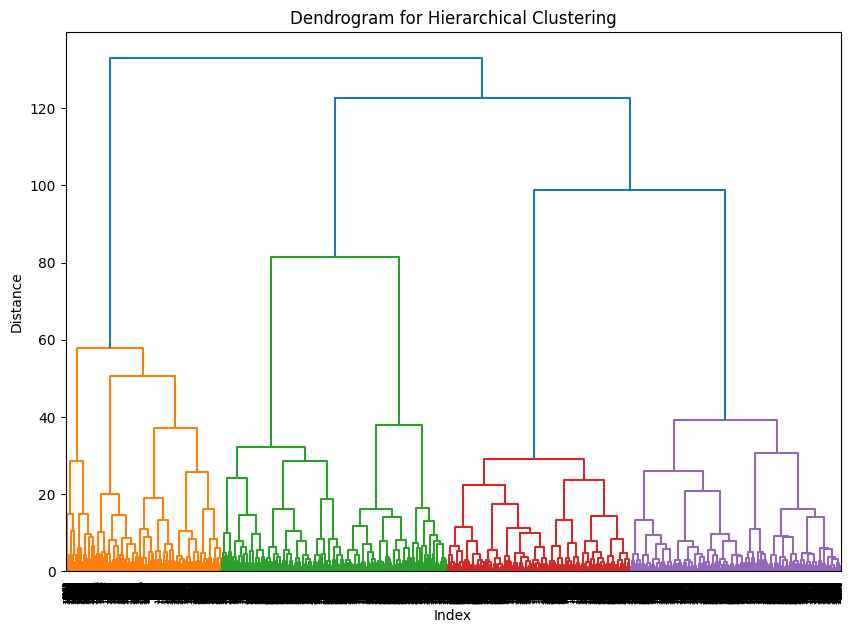

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Tính toán các liên kết phân cấp
Z = linkage(scaled_df, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Cluster_Hierarchical'] = model.fit_predict(scaled_df)
print("Kết quả phân cụm:\n", df[['Cluster_Hierarchical']].value_counts())

Kết quả phân cụm:
 Cluster_Hierarchical
0                       3905
2                       3632
3                       3176
1                       2710
Name: count, dtype: int64


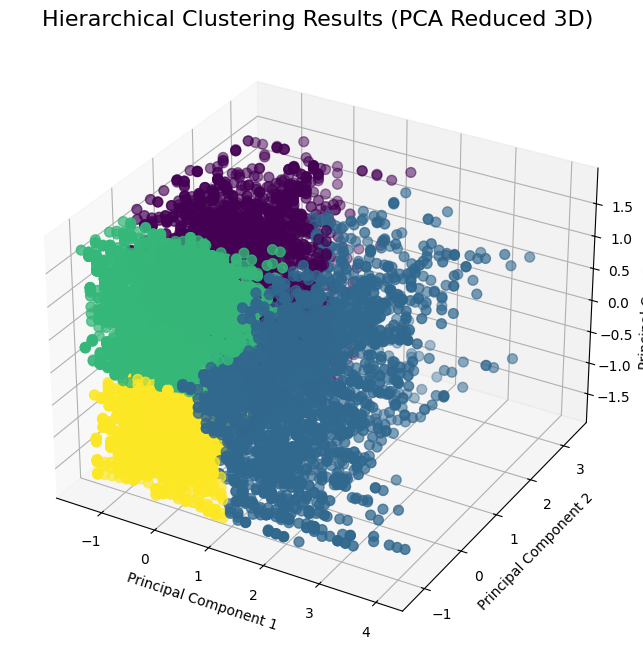

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], scaled_df.iloc[:, 2], 
    c=df['Cluster_Hierarchical'], cmap='viridis', s=50
)
ax.set_title('Hierarchical Clustering Results (PCA Reduced 3D)', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [ ]:
labels = df['Cluster_Hierarchical']
silhouette_avg = silhouette_score(scaled_df, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.25


/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/1075966427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Hierarchical', y=column, data=df, palette=cluster_colors)
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/1075966427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Hierarchical', y=column, data=df, palette=cluster_colors)
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/1075966427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Hierarchical',

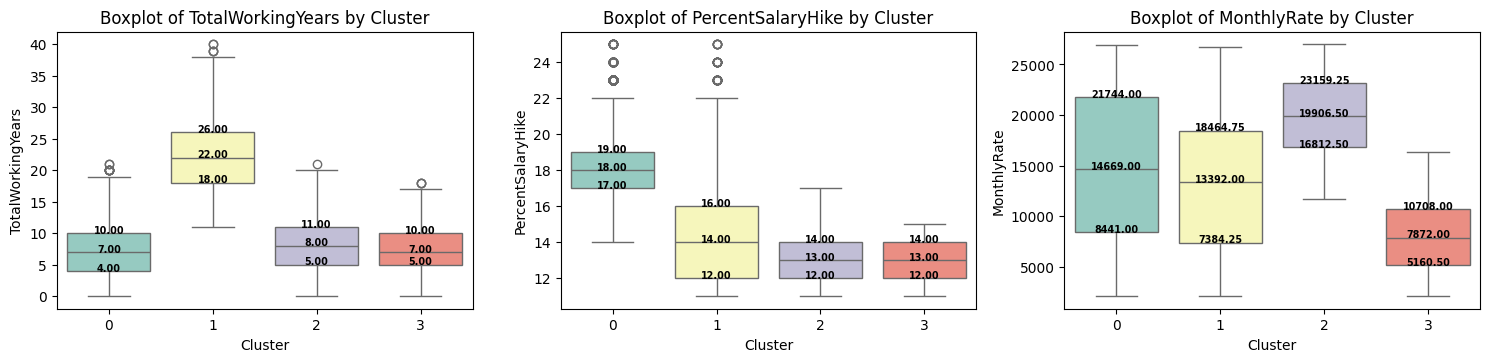

In [ ]:
cluster_colors = sns.color_palette("Set3", n_colors=df['Cluster_Hierarchical'].nunique())
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_FP.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster_Hierarchical', y=column, data=df, palette=cluster_colors)
    for j in range(df['Cluster_Hierarchical'].nunique()):
        q25 = df[df['Cluster_Hierarchical'] == j][column].quantile(0.25)
        q50 = df[df['Cluster_Hierarchical'] == j][column].median()
        q75 = df[df['Cluster_Hierarchical'] == j][column].quantile(0.75)
        xpos = j
        ypos = q50        
        plt.text(xpos, q25, f'{q25:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        plt.text(xpos, ypos, f'{q50:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        plt.text(xpos, q75, f'{q75:.2f}', horizontalalignment='center', size='x-small', color='black', weight='semibold')
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

DSBCAN

In [143]:
df

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated,Cluster,Cluster_DBSCAN
0,100000,2005,57,2,164,0,22,2,1,217,...,5,3,1,2019.0,5,1,0,6,1,0
1,100001,2006,52,2,265,0,19,2,1,519,...,5,3,1,2018.0,7,1,3,5,1,0
2,100002,2006,53,2,607,0,2,2,1,1572,...,1,4,1,2018.0,12,1,4,5,0,0
3,100003,2006,54,2,215,0,19,1,1,309,...,5,3,1,2019.0,2,1,3,6,1,0
4,100004,2007,57,2,285,3,2,1,1,828,...,5,3,1,2018.0,12,1,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,113418,2021,36,1,1266,0,9,1,1,240,...,1,1,0,NaN,15,2,4,0,0,2
13419,113419,2021,31,2,424,0,6,0,1,1919,...,1,1,0,NaN,15,2,6,0,0,1
13420,113420,2021,36,2,927,4,5,1,1,108,...,1,1,0,NaN,15,2,4,0,0,2
13421,113421,2021,58,2,1200,5,14,0,1,1836,...,1,1,0,NaN,15,2,6,3,1,0


In [131]:
data_scaled_df

,TotalWorkingYears,PercentSalaryHike,MonthlyRate,Cluster
0,3.922848,-0.916160,-1.527613,2
1,3.094887,-0.916160,-1.570615,2
2,3.232881,0.403220,0.047318,2
3,3.370874,-1.246005,-1.468168,2
4,3.922848,-0.916160,1.613395,2
...,...,...,...,...
13418,-1.182912,-0.916160,-1.127099,0
13419,-0.906925,-1.246005,1.539336,1
13420,-0.492944,0.073375,-1.051915,0
13421,1.714952,-0.256470,1.034267,2


In [ ]:
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_scaled_df)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(data_scaled)

In [ ]:
print("Kết quả phân cụm DBSCAN:\n", df[['Cluster_DBSCAN']].value_counts())

Kết quả phân cụm DBSCAN:
 Cluster_DBSCAN
 1                4281
 2                4229
 3                2819
 0                2076
-1                  13
 4                   5
Name: count, dtype: int64


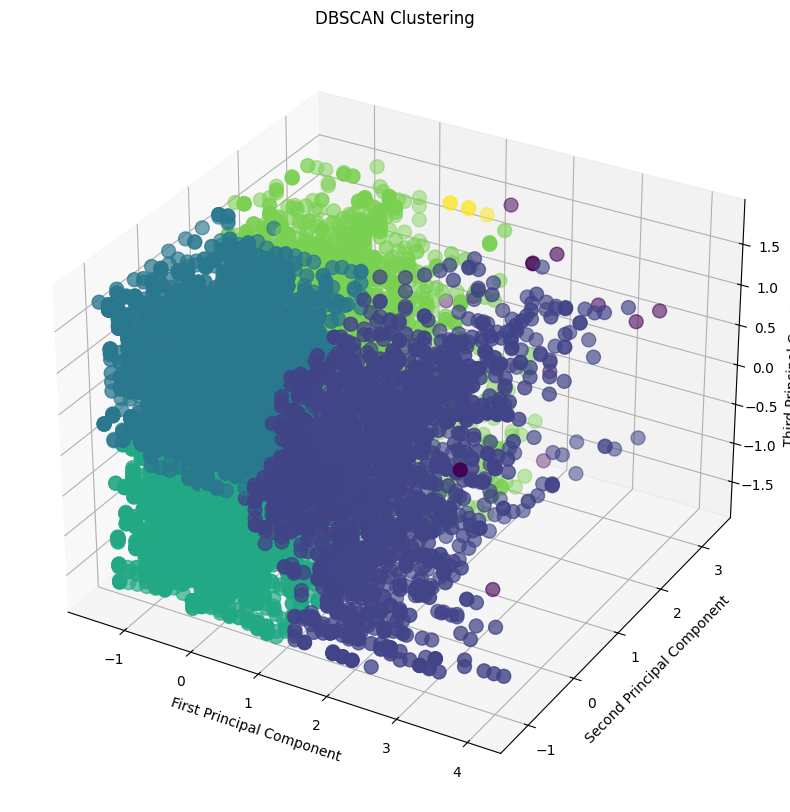

In [141]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
x = data_scaled[:, 0]  
y = data_scaled[:, 1]  
z = data_scaled[:, 2]  
scatter = ax.scatter(x, y, z, c=df['Cluster_DBSCAN'], cmap="viridis", s=100)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
ax.set_title("DBSCAN Clustering")
plt.show()

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/1089485493.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=attr, palette='viridis', ax=axes[i])
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/1089485493.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=attr, palette='viridis', ax=axes[i])
/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_36173/1089485493.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=attr, palette='vi

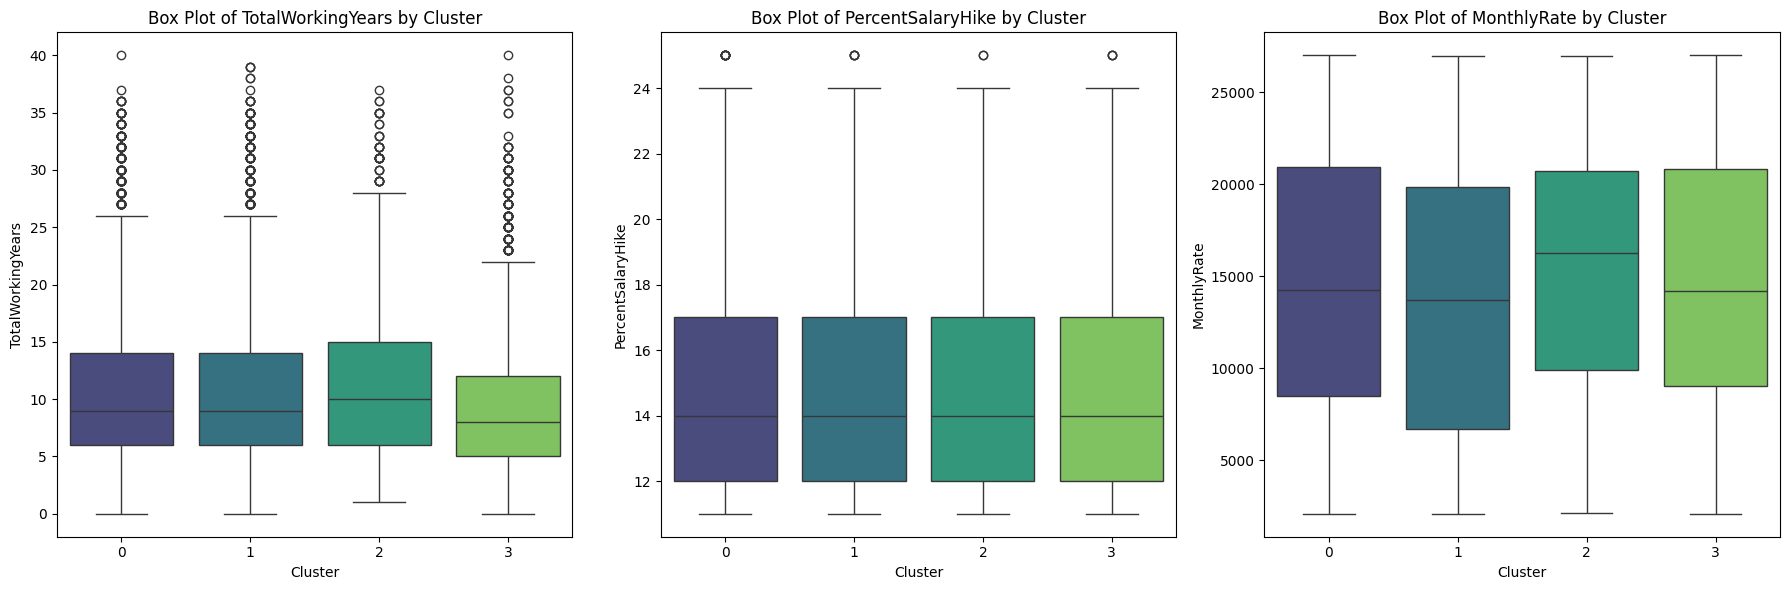

In [ ]:
attributes = ['TotalWorkingYears', 'PercentSalaryHike', 'MonthlyRate']
fig, axes = plt.subplots(1, len(attributes), figsize=(18, 6), sharey=False)
for i, attr in enumerate(attributes):
    sns.boxplot(data=df, x='Cluster', y=attr, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Box Plot of {attr} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(attr)
plt.tight_layout()
plt.show()
